# Optimization Objective
This notebook shows a comparison of using the same planner with different optimization objectives.

In [2]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
from copy import deepcopy

In [33]:
def create_mpb(optimization_objective):
    mpb = MPB()
    mpb.set_planners(['prm'])
    mpb["ompl.sampler"] = "halton"
    mpb.set_steer_functions(['reeds_shepp'])
    mpb['ompl.cost_threshold'] = 0
    mpb.set_corridor_grid_env(radius=5, branches = 15)
    mpb["ompl.seed"] = 0
    mpb.set_id(optimization_objective)
    mpb["ompl.optimization_objective"] = optimization_objective
    return mpb

pool = MultipleMPB()
pool.benchmarks.append(create_mpb("min_pathlength"))
pool.benchmarks.append(create_mpb("min_smoothness"))
pool.benchmarks.append(create_mpb("min_curvature"))
pool.benchmarks.append(create_mpb("max_minclearance"))
pool.run_parallel(runs=10, id='optimization_objectives', show_plot=False)
pool.merge('optimization_objectives/optimization_objectives.json', 
           plan_names=['PRM (min_pathlength)',
                       'PRM (min_smoothness)',
                       'PRM (min_curvature)',
                       'PRM (max_minclearance)'])

Available memory: 8.37 GB, limiting each MPB process to 62.5% usage (5.23 GB).
Creating pool of 4 processes.
Created MPB from config optimization_objectives/min_pathlength_config.json.
Created MPB from config optimization_objectives/max_minclearance_config.json.
Created MPB from config optimization_objectives/min_smoothness_config.json.
Created MPB from config optimization_objectives/min_curvature_config.json.
Running MPB with ID max_minclearance (log file at optimization_objectives/max_minclearance.log)...
Running MPB with ID min_pathlength (log file at optimization_objectives/min_pathlength.log)...
Running MPB with ID min_curvature (log file at optimization_objectives/min_curvature.log)...
Running MPB with ID min_smoothness (log file at optimization_objectives/min_smoothness.log)...



Benchmark 2 (min_curvature) finished successfully.

Benchmark 3 (max_minclearance) finished successfully.

Benchmark 0 (min_pathlength) finished successfully.

Benchmark 1 (min_smoothness) finished successfully.
All benchmarks succeeded.
Successfully merged [optimization_objectives/min_pathlength_results.json, optimization_objectives/min_smoothness_results.json, optimization_objectives/min_curvature_results.json, optimization_objectives/max_minclearance_results.json] into optimization_objectives/optimization_objectives.json.


Visualizing optimization_objectives/optimization_objectives.json


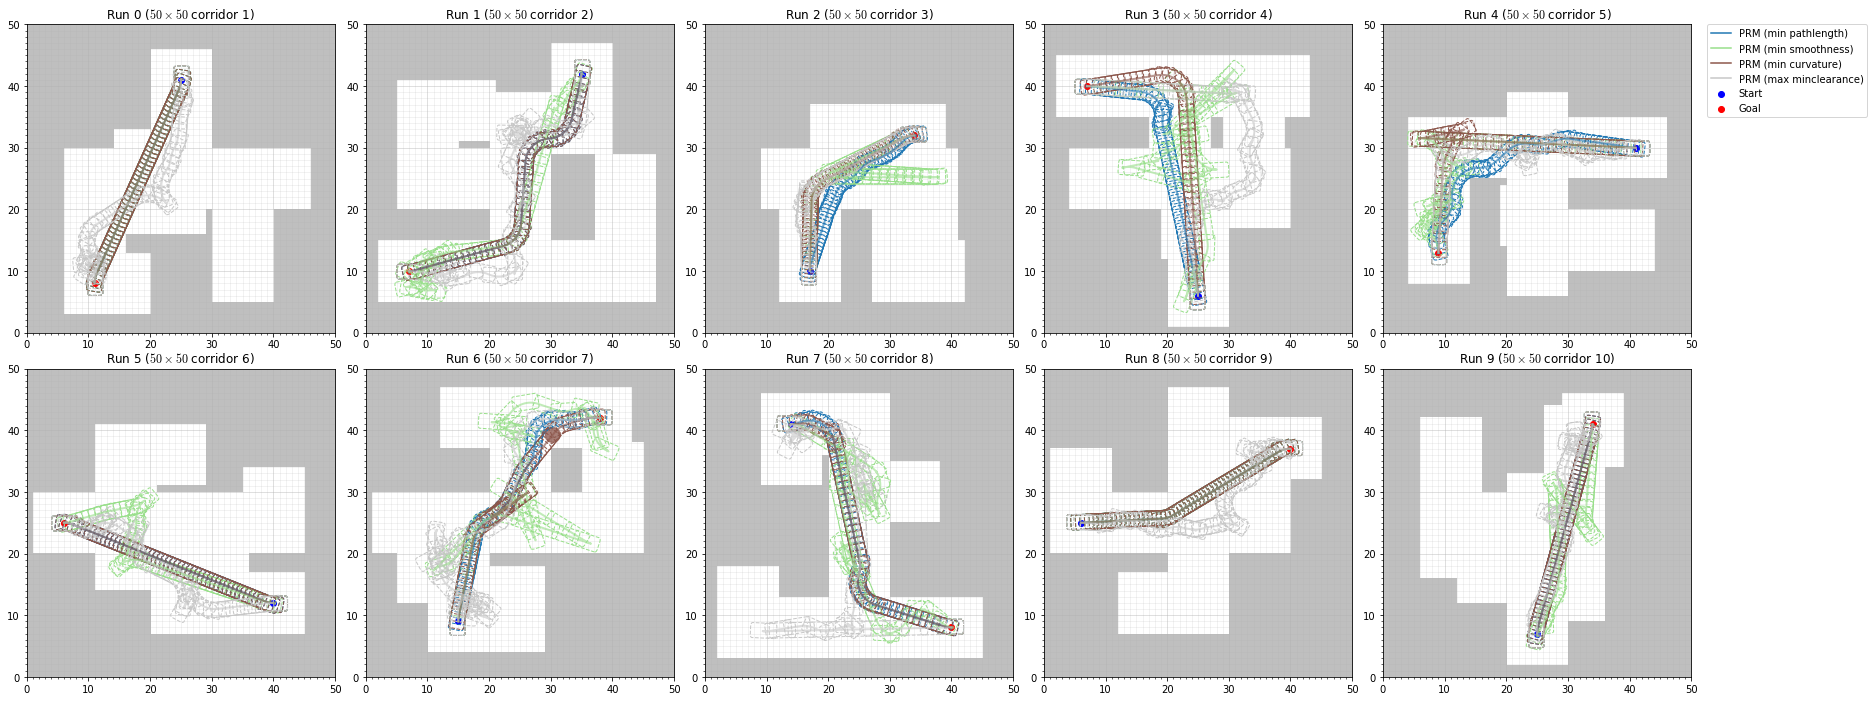

In [34]:
from trajectory import visualize
visualize('optimization_objectives/optimization_objectives.json')

Visualizing optimization_objectives/optimization_objectives.json...


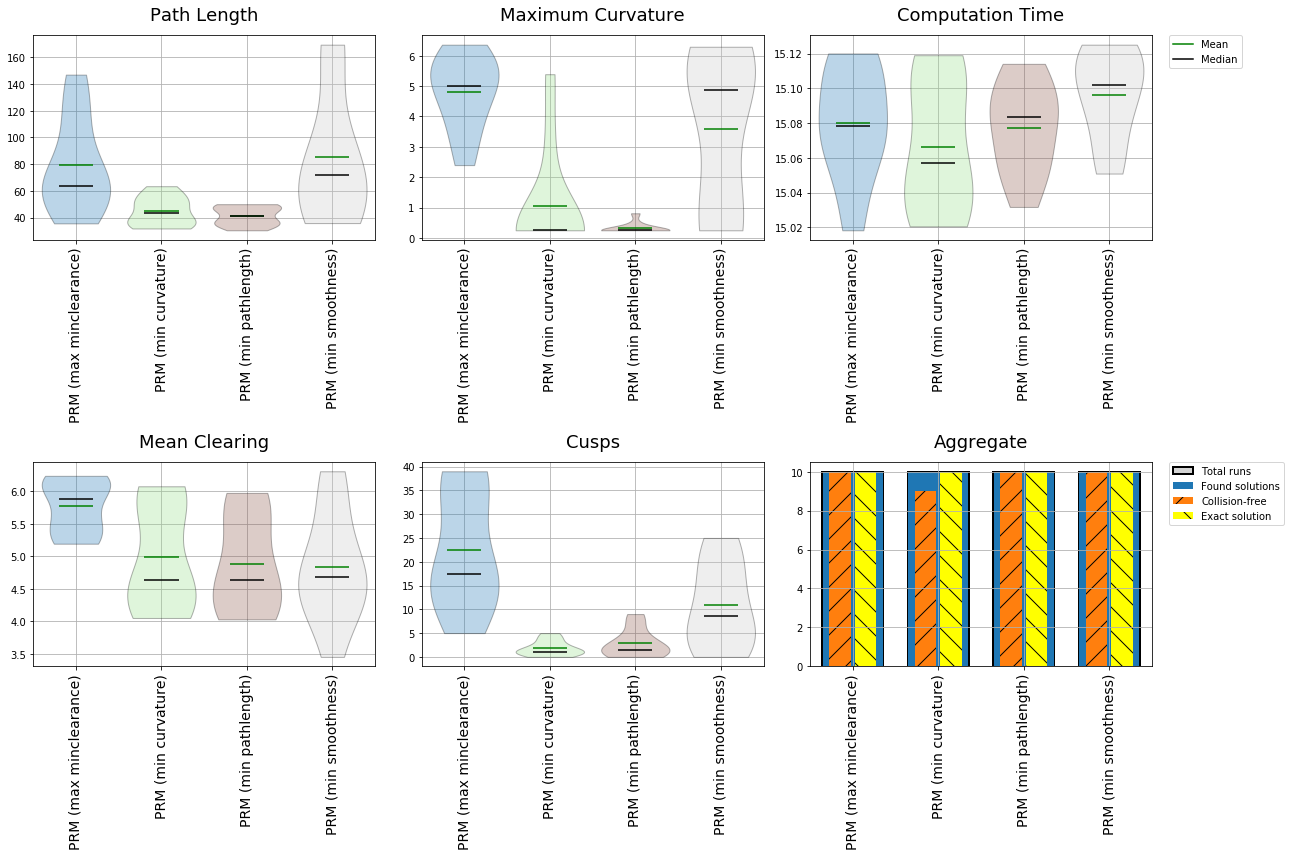

In [35]:
from plot_stats import plot_planner_stats
plot_planner_stats('optimization_objectives/optimization_objectives.json')